In [79]:
def euclidean(p1,p2):
    dist = np.sqrt(np.sum(p1-p2)**2)
    return dist

def KNN(X_train,y,X_input,k):
    op_labels = []
    for item in X_input:
        point_dist = []
        for i in range(len(X_train)):
            dist = euclidean(np.array(X_train[i,:]),item)
            point_dist.append(dist)
        point_dist = np.array(point_dist)
        dist = np.argsort(point_dist)[:k]
        labels = y[dist]
        lab = mode(labels)
        lab = lab.mode[0]
        op_labels.append(lab)
    return op_labels

In [80]:
from pydataset import data
import pandas as pd
import numpy as np
from scipy.stats import mode
from numpy.random import randint
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [81]:
iris = load_iris()
X = iris.data
y = iris.target

In [86]:
train_idx = xxx = randint(0,150,100)
X_train = X[train_idx]
y_train = y[train_idx]

test_idx = xxx = randint(0,150,50)
X_test = X[train_idx]
y_test = y[train_idx]

In [87]:
y_pred = KNN(X_train,y_train,X_test,7)
print(accuracy_score(y_test,y_pred))

0.9


C:\Users\chand\AppData\Local\Temp\ipykernel_8300\1131240287.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  lab = mode(labels)


In [62]:
from pydataset import data
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [55]:
data = data('iris')
data.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [56]:
X = data.iloc[:,0:4]
y = data.iloc[:,4]

In [58]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2,random_state=0)

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [64]:
clf = KNeighborsClassifier(n_neighbors=7,p=2,metric='euclidean')

In [65]:
clf.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [71]:
y_pred = clf.predict(X_test)

In [67]:
clf.score(X_train,y_train)

0.9666666666666667

In [74]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,plot_confusion_matrix
print('accuracy:',accuracy_score(y_test,y_pred))
print('conmat:\n',confusion_matrix(y_test,y_pred))

accuracy: 0.8333333333333334
conmat:
 [[11  0  0]
 [ 0  8  5]
 [ 0  0  6]]


C:\Users\chand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


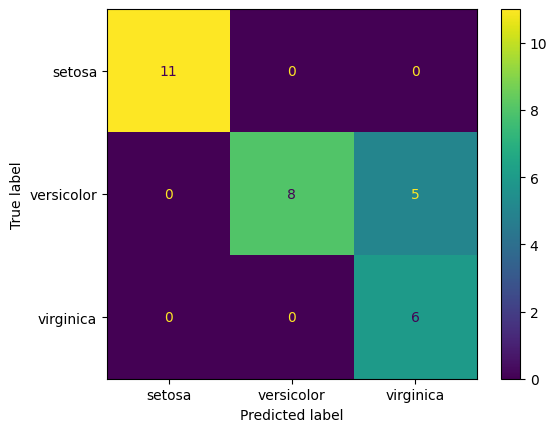

In [75]:
plot_confusion_matrix(clf,X_test,y_test)

In [77]:
print('class:',classification_report(y_test,y_pred))

class:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.62      0.76        13
   virginica       0.55      1.00      0.71         6

    accuracy                           0.83        30
   macro avg       0.85      0.87      0.82        30
weighted avg       0.91      0.83      0.84        30

